### Dependencies

In [4]:
import matplotlib as mpl
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter

new_rc_paramas = {
    'text.usetex' : True,
    'figure.dpi' : 180,
    'text.latex.preamble' : r'\usepackage{libertine}'r'\usepackage{libertinust1math}',
    'font.family' : 'Linux Libertine',
    'axes.titlesize' : 22,
    'axes.labelsize' : 18,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'xtick.top' : True,
    'ytick.right' : True,
    'legend.fontsize' : 'large',
    'axes.linewidth' : 1.2,
    'savefig.bbox' : 'tight',
    'image.aspect' : 'equal',
}

Oh2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^2)$')
Oh3 = mlines.Line2D([], [], color='black', linestyle="-.", label=r'$\mathcal{O}(h^3)$')
Oh1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h)$')
Ohneg2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-2})$')
Ohneg1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-1})$')
Odt = mlines.Line2D([], [], color='black', linestyle="--", label=r'$\mathcal{O}(\Delta t)$')
Odt2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(\Delta t^2)$')
tau1 = mlines.Line2D([], [], color='C4', linestyle="--", label=r'$\tau_0 = \tau_1 = 1$')
tau10neg4 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-4}$')
tau10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-3}$')
tau3x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-3}$')
tau5x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-3}$')
tau3x10neg4 = mlines.Line2D([], [], color='C2', linestyle="-.", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-4}$')
tau5x10neg4 = mlines.Line2D([], [], color='C3', linestyle=":", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-4}$')

conservative = mlines.Line2D([0], [0], marker='None', color='black', linestyle=":", label='Conservative')
classical = mlines.Line2D([0], [0], marker='None', color='black', linestyle=(0, (5,7)), label='Non-conservative')


space = mlines.Line2D([0], [0], marker='None', color='None', linestyle="None", label=' ')

circle = mlines.Line2D([0], [0], marker='o', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Full stabilization.')
                          
star = mlines.Line2D([], [], color='black', marker='*',
                          markersize=9,linestyle="None",
                        markeredgewidth=0.8, markerfacecolor="None", 
                        label='Macro stabilization.')

triangle = mlines.Line2D([0], [0], marker='^', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Macro stab. 2')


mpl.rcParams.update(new_rc_paramas)

import numpy as np

def convergence_rate(errors, mesh_sizes):
    if len(errors) < 2 or len(mesh_sizes) < 2 or len(errors) != len(mesh_sizes):
        raise ValueError("At least two errors and mesh sizes are required.")

    # Take logarithm of errors and mesh sizes
    log_errors = np.log(errors)
    log_mesh_sizes = np.log(mesh_sizes)

    # Compute differences between consecutive elements
    delta_errors = np.diff(log_errors)
    delta_mesh_sizes = np.diff(log_mesh_sizes)

    # Compute convergence rate
    convergence_rates = delta_errors / delta_mesh_sizes

    return convergence_rates


### Errors

[1.61075887 2.08247897 1.9808326 ]
[0.87820858 1.05892735 0.97481922]


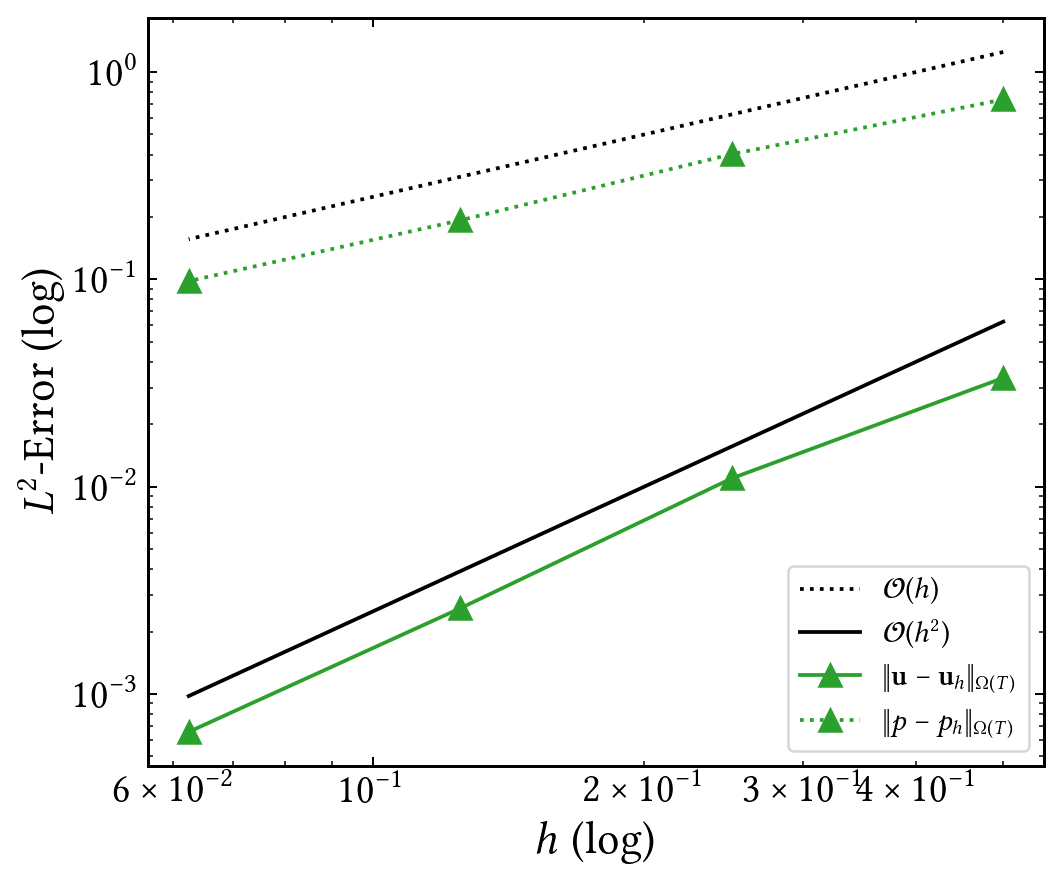

In [6]:
# mu = 1, rho = 1

# taylor hood
error_u = [0.008987112638515449, 0.002740411454831107, 0.0007657847574674886, 0.0002045013687960165]
error_p = [0.01577306552104151, 0.004797022003362399, 0.001603957532370062, 0.0005515429938837239]

# BDM1 x P0
error_u = [0.03347594978645296, 0.01096089888036042, 0.002587959860419136, 0.0006556431159321815]
error_p = [0.73799418337865, 0.4015002443236859, 0.1927156202476352, 0.09805440082414765]

h = [0.5, 0.25, 0.125, 0.0625]

print(convergence_rate(error_u, h))
print(convergence_rate(error_p, h))

fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.loglog(h, 2.5*np.power(h, 1),label=r"$\mathcal{O}(h)$", linestyle=":", color="black")   
ax.loglog(h, 2.5e-1*np.power(h, 2),label=r"$\mathcal{O}(h^2)$", linestyle="-", color="black")   


ax.loglog(h, error_u, label= r"$\|\mathbf{u}-\mathbf{u}_h\|_{\Omega(T)}$", marker='^', markersize=9, linestyle="-", color="C2")
ax.loglog(h, error_p, label= r"$\|p-p_h\|_{\Omega(T)}$", marker='^', markersize=9, linestyle=":", color="C2")

#ax1.set_ylim(1e-4, 2)
#ax1.set_yticks([1e-8, 1e-6, 1e-4, 1e-2, 1e0])
ax.set_xlabel(r"$h$ (log)")
ax.tick_params(axis='both', which='major')
ax.set_ylabel(r"$L^2$-Error (log)")
#ax.set_title(r"$\|e_h(T)\|_{L^2(\Omega(T))}$ vs $h$")
ax.legend()
#ax.grid()

fig.tight_layout()
plt.show()
